In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('Sales Data.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [ ]:
print(df.isnull().sum())
df.describe()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [ ]:
df_qvs = df.drop(['Unnamed: 0','Order ID','Order Date','Price Each','Purchase Address','Price Each','Hour','City','Month'],axis=1)
agg_func = {'Quantity Ordered': 'sum', 'Sales': 'sum', 'Product': 'first'}
df_qvs = df_qvs.groupby(df['Product']).aggregate(agg_func)
df_qvs.head(19)

,Quantity Ordered,Sales,Product
Product,,,
20in Monitor,4129,454148.71,20in Monitor
27in 4K Gaming Monitor,6244,2435097.56,27in 4K Gaming Monitor
27in FHD Monitor,7550,1132424.50,27in FHD Monitor
34in Ultrawide Monitor,6199,2355558.01,34in Ultrawide Monitor
AA Batteries (4-pack),27635,106118.40,AA Batteries (4-pack)
AAA Batteries (4-pack),31017,92740.83,AAA Batteries (4-pack)
Apple Airpods Headphones,15661,2349150.00,Apple Airpods Headphones
Bose SoundSport Headphones,13457,1345565.43,Bose SoundSport Headphones
Flatscreen TV,4819,1445700.00,Flatscreen TV


In [ ]:
df_cvs = df.drop(['Unnamed: 0','Order ID','Order Date','Price Each','Purchase Address','Price Each','Hour','Product','Quantity Ordered','Month'],axis=1)
agg_func = {'City':'first','Sales':'sum'}
df_cvs = df_cvs.groupby(df['City']).aggregate(agg_func)
df_cvs.head(25)

,City,Sales
City,,
Atlanta,Atlanta,2795498.58
Austin,Austin,1819581.75
Boston,Boston,3661642.01
Dallas,Dallas,2767975.40
Los Angeles,Los Angeles,5452570.80
New York City,New York City,4664317.43
Portland,Portland,2320490.61
San Francisco,San Francisco,8262203.91
Seattle,Seattle,2747755.48


In [ ]:
df_cvq = df.drop(['Unnamed: 0','Order ID','Order Date','Price Each','Purchase Address','Price Each','Hour','Month'],axis=1)
agg_func = {'City':'first','Quantity Ordered':'sum'}
df_cvq = df_cvq.groupby(df['City']).aggregate(agg_func)
df_cvq.head(19)

,City,Quantity Ordered
City,,
Atlanta,Atlanta,16602
Austin,Austin,11153
Boston,Boston,22528
Dallas,Dallas,16730
Los Angeles,Los Angeles,33289
New York City,New York City,27932
Portland,Portland,14053
San Francisco,San Francisco,50239
Seattle,Seattle,16553


In [ ]:
df_hvq = df.drop(['Unnamed: 0','Order ID','Order Date','Price Each','Purchase Address','Price Each','City','Month'],axis=1)
agg_func = {'Hour':'first','Quantity Ordered':'sum'}
df_hvq = df_hvq.groupby(df['Hour']).aggregate(agg_func)
df_hvq.head(26)

,Hour,Quantity Ordered
Hour,,
0,0,4428
1,1,2619
2,2,1398
3,3,928
4,4,937
5,5,1493
6,6,2810
7,7,4556
8,8,7002


Text(0, 0.5, 'Quantity Ordered')

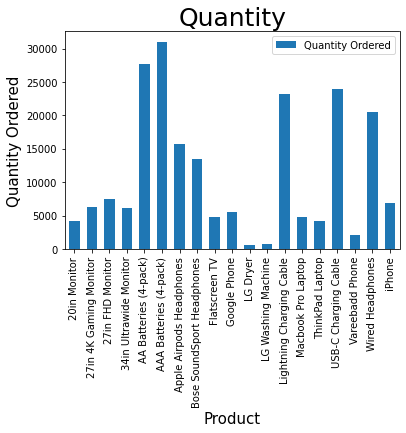

In [ ]:
df_qvs.plot(x="Product", y='Quantity Ordered', kind="bar",width=0.6,)
plt.title('Quantity',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('Quantity Ordered',size=15)

Text(0, 0.5, 'Sales')

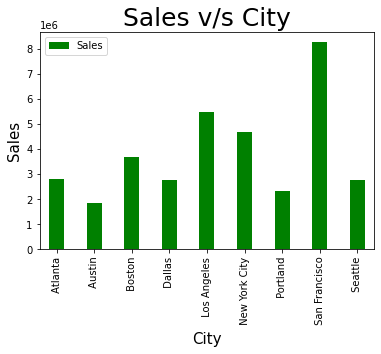

In [ ]:
df_cvs.plot(x="City", y='Sales', kind="bar",width=0.4,color='green')
plt.title('Sales v/s City',size=25)
plt.xlabel('City',size=15)
plt.ylabel('Sales',size=15)

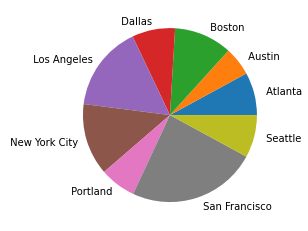

In [ ]:
plt.pie(df_cvq["Quantity Ordered"], labels=df_cvq["City"])
plt.show()

Text(0, 0.5, 'Quantity Ordered')

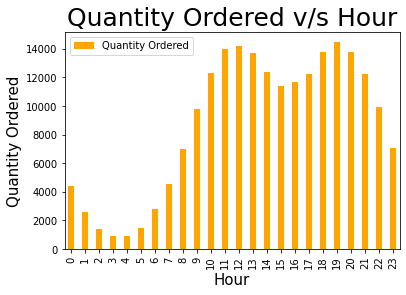

In [ ]:
df_hvq.plot(x='Hour',y='Quantity Ordered',kind='bar',width=0.4,color='orange')
plt.title('Quantity Ordered v/s Hour',size=25)
plt.xlabel('Hour',size=15)
plt.ylabel('Quantity Ordered',size=15)

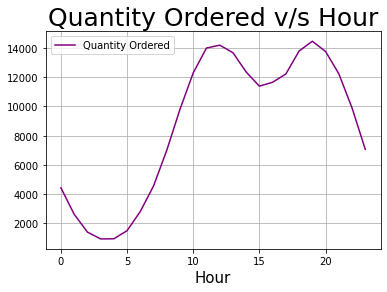

In [ ]:
df_hvq.plot(x='Hour',y='Quantity Ordered',kind='line',color='purple')
plt.title('Quantity Ordered v/s Hour',size=25)
plt.xlabel('Hour',size=15)
plt.grid()

In [ ]:
city = {' Atlanta':0,' Austin':1,' Boston':2,' Dallas':3,' Los Angeles':4,' New York City':5,' Portland':6,' San Francisco':7,' Seattle':8}
df.City = [city[item] for item in df.City]
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,5,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,5,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,5,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,7,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,0,12


,Product,Sales,Quantity Ordered
Product,,,
20in Monitor,20in Monitor,37616.58,342
27in 4K Gaming Monitor,27in 4K Gaming Monitor,192265.07,493
27in FHD Monitor,27in FHD Monitor,88194.12,588
34in Ultrawide Monitor,34in Ultrawide Monitor,183155.18,482
AA Batteries (4-pack),AA Batteries (4-pack),8421.12,2193
AAA Batteries (4-pack),AAA Batteries (4-pack),7053.41,2359
Apple Airpods Headphones,Apple Airpods Headphones,189900.00,1266
Bose SoundSport Headphones,Bose SoundSport Headphones,108389.16,1084
Flatscreen TV,Flatscreen TV,122100.00,407


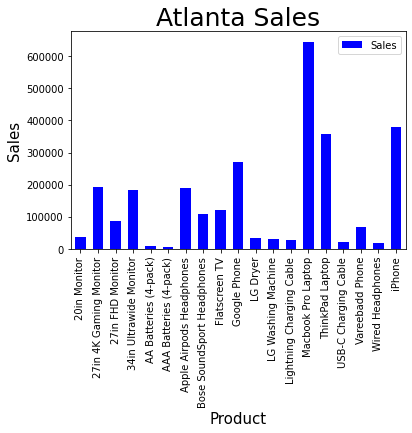

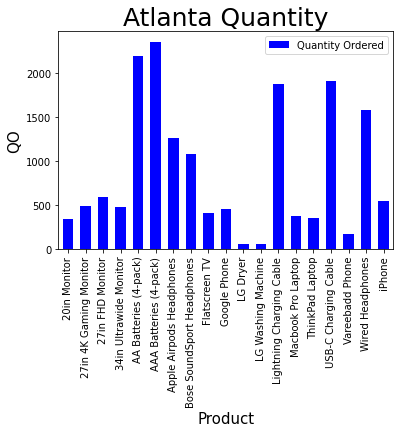

In [ ]:
df = pd.read_csv('Sales Data.csv')
#ATLANTA
city = {' Atlanta':0,' Austin':1,' Boston':2,' Dallas':3,' Los Angeles':4,' New York City':5,' Portland':6,' San Francisco':7,' Seattle':8}
df.City = [city[item] for item in df.City]
city_names = df[df['City'] != 0].index
df.drop(city_names, inplace=True)

df = df.drop(['Unnamed: 0','Order ID','Order Date','Price Each','Purchase Address','Price Each','City','Month'],axis=1)
agg_func = {'Product':'first','Sales':'sum','Quantity Ordered':'sum'}
df = df.groupby(df['Product']).aggregate(agg_func)

df.plot(x="Product", y='Sales', kind="bar",width=0.6,color='blue')
plt.title('Atlanta Sales',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('Sales',size=15)

df.plot(x="Product", y='Quantity Ordered', kind="bar",width=0.6,color='blue')
plt.title('Atlanta Quantity',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('QO',size=15)
df.head(19)

,Product,Sales,Quantity Ordered
Product,,,
20in Monitor,20in Monitor,25297.70,230
27in 4K Gaming Monitor,27in 4K Gaming Monitor,124016.82,318
27in FHD Monitor,27in FHD Monitor,53996.40,360
34in Ultrawide Monitor,34in Ultrawide Monitor,124636.72,328
AA Batteries (4-pack),AA Batteries (4-pack),5468.16,1424
AAA Batteries (4-pack),AAA Batteries (4-pack),4987.32,1668
Apple Airpods Headphones,Apple Airpods Headphones,133050.00,887
Bose SoundSport Headphones,Bose SoundSport Headphones,70692.93,707
Flatscreen TV,Flatscreen TV,72600.00,242


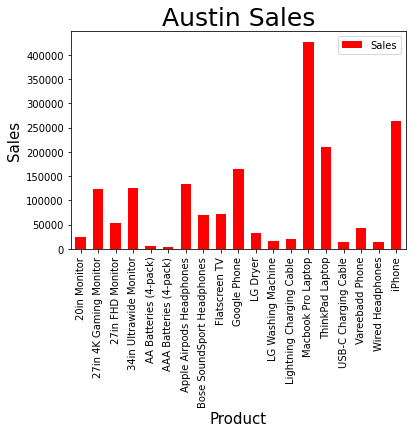

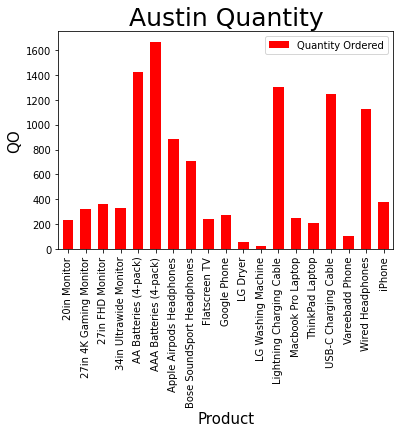

In [ ]:
df = pd.read_csv('Sales Data.csv')
#Austin
city = {' Atlanta':0,' Austin':1,' Boston':2,' Dallas':3,' Los Angeles':4,' New York City':5,' Portland':6,' San Francisco':7,' Seattle':8}
df.City = [city[item] for item in df.City]
city_names = df[df['City'] != 1].index
df.drop(city_names, inplace=True)

df = df.drop(['Unnamed: 0','Order ID','Order Date','Price Each','Purchase Address','Price Each','City','Month'],axis=1)
agg_func = {'Product':'first','Sales':'sum','Quantity Ordered':'sum'}
df = df.groupby(df['Product']).aggregate(agg_func)

df.plot(x="Product", y='Sales', kind="bar",width=0.6,color='red')
plt.title('Austin Sales',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('Sales',size=15)

df.plot(x="Product", y='Quantity Ordered', kind="bar",width=0.6,color='red')
plt.title('Austin Quantity',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('QO',size=15)
df.head(19)

,Product,Sales,Quantity Ordered
Product,,,
20in Monitor,20in Monitor,43336.06,394
27in 4K Gaming Monitor,27in 4K Gaming Monitor,263243.25,675
27in FHD Monitor,27in FHD Monitor,119542.03,797
34in Ultrawide Monitor,34in Ultrawide Monitor,254973.29,671
AA Batteries (4-pack),AA Batteries (4-pack),11581.44,3016
AAA Batteries (4-pack),AAA Batteries (4-pack),10348.39,3461
Apple Airpods Headphones,Apple Airpods Headphones,247950.00,1653
Bose SoundSport Headphones,Bose SoundSport Headphones,141585.84,1416
Flatscreen TV,Flatscreen TV,166200.00,554


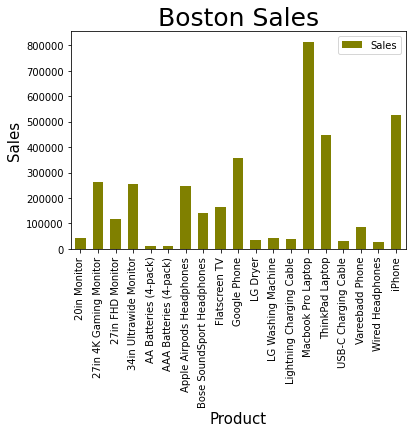

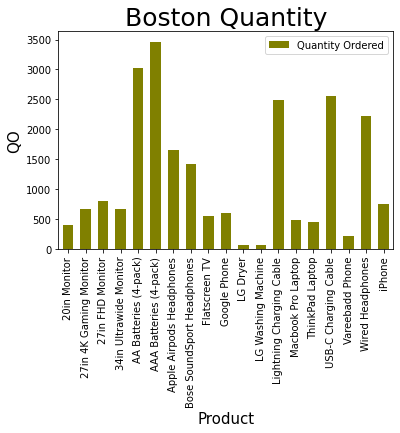

In [ ]:
df = pd.read_csv('Sales Data.csv')
#Boston
city = {' Atlanta':0,' Austin':1,' Boston':2,' Dallas':3,' Los Angeles':4,' New York City':5,' Portland':6,' San Francisco':7,' Seattle':8}
df.City = [city[item] for item in df.City]
city_names = df[df['City'] != 2].index
df.drop(city_names, inplace=True)

df = df.drop(['Unnamed: 0','Order ID','Order Date','Price Each','Purchase Address','Price Each','City','Month'],axis=1)
agg_func = {'Product':'first','Sales':'sum','Quantity Ordered':'sum'}
df = df.groupby(df['Product']).aggregate(agg_func)

df.plot(x="Product", y='Sales', kind="bar",width=0.6,color='olive')
plt.title('Boston Sales',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('Sales',size=15)

df.plot(x="Product", y='Quantity Ordered', kind="bar",width=0.6,color='olive')
plt.title('Boston Quantity',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('QO',size=15)
df.head(19)

,Product,Sales,Quantity Ordered
Product,,,
20in Monitor,20in Monitor,37726.57,343
27in 4K Gaming Monitor,27in 4K Gaming Monitor,187585.19,481
27in FHD Monitor,27in FHD Monitor,88044.13,587
34in Ultrawide Monitor,34in Ultrawide Monitor,194554.88,512
AA Batteries (4-pack),AA Batteries (4-pack),8682.24,2261
AAA Batteries (4-pack),AAA Batteries (4-pack),7486.96,2504
Apple Airpods Headphones,Apple Airpods Headphones,179100.00,1194
Bose SoundSport Headphones,Bose SoundSport Headphones,106289.37,1063
Flatscreen TV,Flatscreen TV,126000.00,420


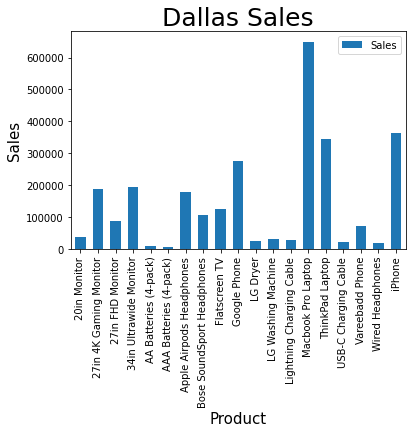

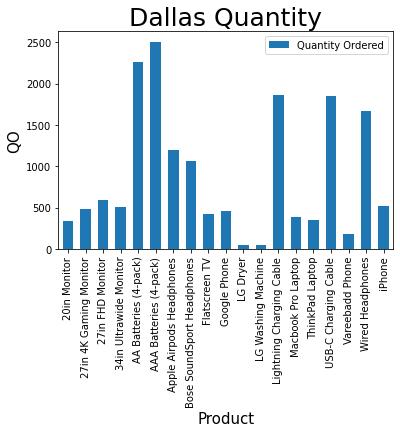

In [ ]:
df = pd.read_csv('Sales Data.csv')
#Dallas
city = {' Atlanta':0,' Austin':1,' Boston':2,' Dallas':3,' Los Angeles':4,' New York City':5,' Portland':6,' San Francisco':7,' Seattle':8}
df.City = [city[item] for item in df.City]
city_names = df[df['City'] != 3].index
df.drop(city_names, inplace=True)

df = df.drop(['Unnamed: 0','Order ID','Order Date','Price Each','Purchase Address','Price Each','City','Month'],axis=1)
agg_func = {'Product':'first','Sales':'sum','Quantity Ordered':'sum'}
df = df.groupby(df['Product']).aggregate(agg_func)

df.plot(x="Product", y='Sales', kind="bar",width=0.6)
plt.title('Dallas Sales',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('Sales',size=15)

df.plot(x="Product", y='Quantity Ordered', kind="bar",width=0.6)
plt.title('Dallas Quantity',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('QO',size=15)
df.head(19)


,Product,Sales,Quantity Ordered
Product,,,
20in Monitor,20in Monitor,72373.42,658
27in 4K Gaming Monitor,27in 4K Gaming Monitor,391159.97,1003
27in FHD Monitor,27in FHD Monitor,183437.77,1223
34in Ultrawide Monitor,34in Ultrawide Monitor,362890.45,955
AA Batteries (4-pack),AA Batteries (4-pack),17041.92,4438
AAA Batteries (4-pack),AAA Batteries (4-pack),14851.33,4967
Apple Airpods Headphones,Apple Airpods Headphones,370950.00,2473
Bose SoundSport Headphones,Bose SoundSport Headphones,212478.75,2125
Flatscreen TV,Flatscreen TV,218100.00,727


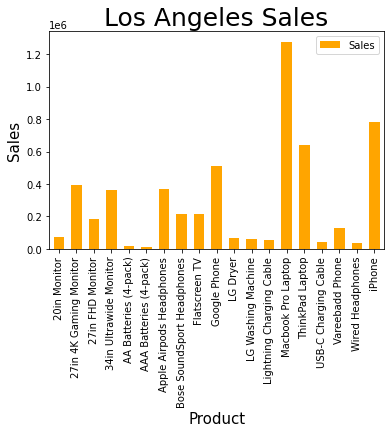

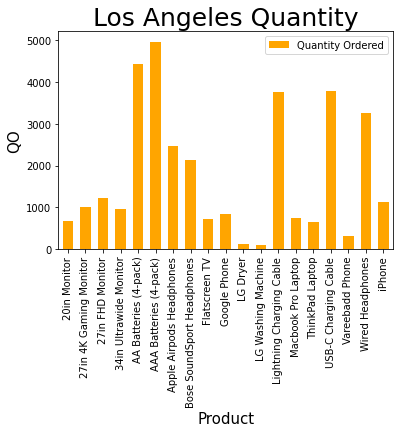

In [ ]:
df = pd.read_csv('Sales Data.csv')
#LosAngeles
city = {' Atlanta':0,' Austin':1,' Boston':2,' Dallas':3,' Los Angeles':4,' New York City':5,' Portland':6,' San Francisco':7,' Seattle':8}
df.City = [city[item] for item in df.City]
city_names = df[df['City'] != 4].index
df.drop(city_names, inplace=True)

df = df.drop(['Unnamed: 0','Order ID','Order Date','Price Each','Purchase Address','Price Each','City','Month'],axis=1)
agg_func = {'Product':'first','Sales':'sum','Quantity Ordered':'sum'}
df = df.groupby(df['Product']).aggregate(agg_func)

df.plot(x="Product", y='Sales', kind="bar",width=0.6,color='orange')
plt.title('Los Angeles Sales',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('Sales',size=15)

df.plot(x="Product", y='Quantity Ordered', kind="bar",width=0.6,color='orange')
plt.title('Los Angeles Quantity',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('QO',size=15)
df.head(19)

,Product,Sales,Quantity Ordered
Product,,,
20in Monitor,20in Monitor,61594.40,560
27in 4K Gaming Monitor,27in 4K Gaming Monitor,328371.58,842
27in FHD Monitor,27in FHD Monitor,160789.28,1072
34in Ultrawide Monitor,34in Ultrawide Monitor,329831.32,868
AA Batteries (4-pack),AA Batteries (4-pack),13939.20,3630
AAA Batteries (4-pack),AAA Batteries (4-pack),12330.76,4124
Apple Airpods Headphones,Apple Airpods Headphones,314700.00,2098
Bose SoundSport Headphones,Bose SoundSport Headphones,179382.06,1794
Flatscreen TV,Flatscreen TV,188400.00,628


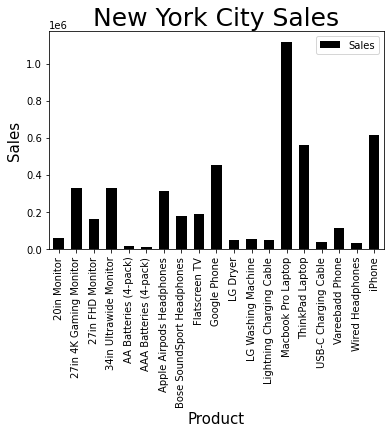

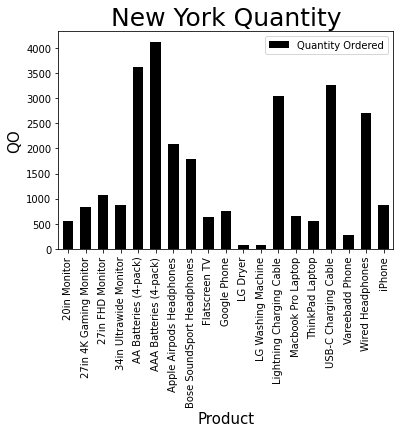

In [ ]:
df = pd.read_csv('Sales Data.csv')
#NYC
city = {' Atlanta':0,' Austin':1,' Boston':2,' Dallas':3,' Los Angeles':4,' New York City':5,' Portland':6,' San Francisco':7,' Seattle':8}
df.City = [city[item] for item in df.City]
city_names = df[df['City'] != 5].index
df.drop(city_names, inplace=True)

df = df.drop(['Unnamed: 0','Order ID','Order Date','Price Each','Purchase Address','Price Each','City','Month'],axis=1)
agg_func = {'Product':'first','Sales':'sum','Quantity Ordered':'sum'}
df = df.groupby(df['Product']).aggregate(agg_func)

df.plot(x="Product", y='Sales', kind="bar",width=0.6,color='black')
plt.title('New York City Sales',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('Sales',size=15)

df.plot(x="Product", y='Quantity Ordered', kind="bar",width=0.6,color='black')
plt.title('New York Quantity',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('QO',size=15)
df.head(19)

,Product,Sales,Quantity Ordered
Product,,,
20in Monitor,20in Monitor,109990.00,1000
27in 4K Gaming Monitor,27in 4K Gaming Monitor,569385.40,1460
27in FHD Monitor,27in FHD Monitor,272081.86,1814
34in Ultrawide Monitor,34in Ultrawide Monitor,549465.54,1446
AA Batteries (4-pack),AA Batteries (4-pack),25171.20,6555
AAA Batteries (4-pack),AAA Batteries (4-pack),22149.92,7408
Apple Airpods Headphones,Apple Airpods Headphones,559950.00,3733
Bose SoundSport Headphones,Bose SoundSport Headphones,331666.83,3317
Flatscreen TV,Flatscreen TV,346200.00,1154


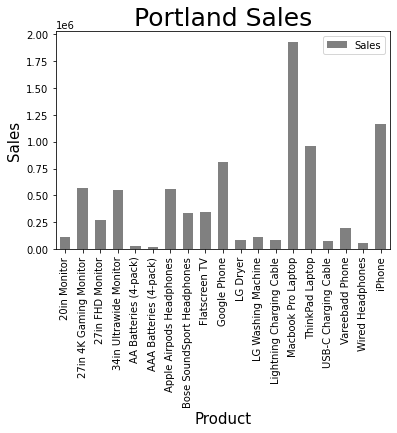

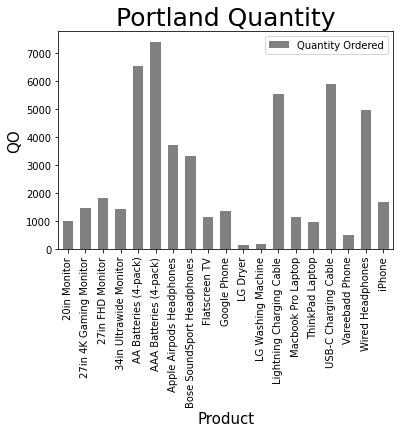

In [ ]:
df = pd.read_csv('Sales Data.csv')
#Portland
city = {' Atlanta':0,' Austin':1,' Boston':2,' Dallas':3,' Los Angeles':4,' New York City':5,' Portland':6,' San Francisco':7,' Seattle':8}
df.City = [city[item] for item in df.City]
city_names = df[df['City'] != 7].index
df.drop(city_names, inplace=True)

df = df.drop(['Unnamed: 0','Order ID','Order Date','Price Each','Purchase Address','Price Each','City','Month'],axis=1)
agg_func = {'Product':'first','Sales':'sum','Quantity Ordered':'sum'}
df = df.groupby(df['Product']).aggregate(agg_func)

df.plot(x="Product", y='Sales', kind="bar",width=0.6,color='grey')
plt.title('Portland Sales',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('Sales',size=15)

df.plot(x="Product", y='Quantity Ordered', kind="bar",width=0.6,color='grey')
plt.title('Portland Quantity',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('QO',size=15)
df.head(19)

,Product,Sales,Quantity Ordered
Product,,,
20in Monitor,20in Monitor,109990.00,1000
27in 4K Gaming Monitor,27in 4K Gaming Monitor,569385.40,1460
27in FHD Monitor,27in FHD Monitor,272081.86,1814
34in Ultrawide Monitor,34in Ultrawide Monitor,549465.54,1446
AA Batteries (4-pack),AA Batteries (4-pack),25171.20,6555
AAA Batteries (4-pack),AAA Batteries (4-pack),22149.92,7408
Apple Airpods Headphones,Apple Airpods Headphones,559950.00,3733
Bose SoundSport Headphones,Bose SoundSport Headphones,331666.83,3317
Flatscreen TV,Flatscreen TV,346200.00,1154


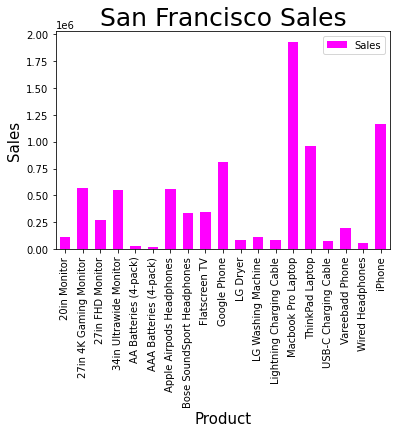

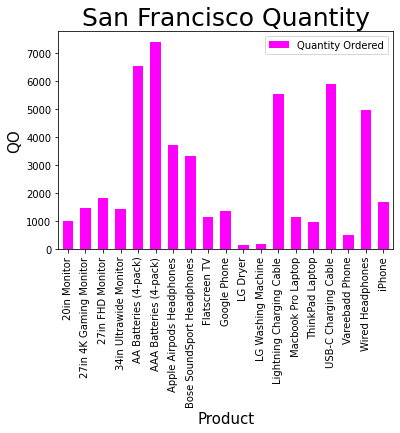

In [ ]:
df = pd.read_csv('Sales Data.csv')
#SanFrancisco
city = {' Atlanta':0,' Austin':1,' Boston':2,' Dallas':3,' Los Angeles':4,' New York City':5,' Portland':6,' San Francisco':7,' Seattle':8}
df.City = [city[item] for item in df.City]
city_names = df[df['City'] != 7].index
df.drop(city_names, inplace=True)

df = df.drop(['Unnamed: 0','Order ID','Order Date','Price Each','Purchase Address','Price Each','City','Month'],axis=1)
agg_func = {'Product':'first','Sales':'sum','Quantity Ordered':'sum'}
df = df.groupby(df['Product']).aggregate(agg_func)

df.plot(x="Product", y='Sales', kind="bar",width=0.6,color='magenta')
plt.title('San Francisco Sales',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('Sales',size=15)

df.plot(x="Product", y='Quantity Ordered', kind="bar",width=0.6,color='magenta')
plt.title('San Francisco Quantity',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('QO',size=15)
df.head(19)

,Product,Sales,Quantity Ordered
Product,,,
20in Monitor,20in Monitor,35636.76,324
27in 4K Gaming Monitor,27in 4K Gaming Monitor,209814.62,538
27in FHD Monitor,27in FHD Monitor,86844.21,579
34in Ultrawide Monitor,34in Ultrawide Monitor,202914.66,534
AA Batteries (4-pack),AA Batteries (4-pack),8367.36,2179
AAA Batteries (4-pack),AAA Batteries (4-pack),7313.54,2446
Apple Airpods Headphones,Apple Airpods Headphones,188700.00,1258
Bose SoundSport Headphones,Bose SoundSport Headphones,106189.38,1062
Flatscreen TV,Flatscreen TV,112500.00,375


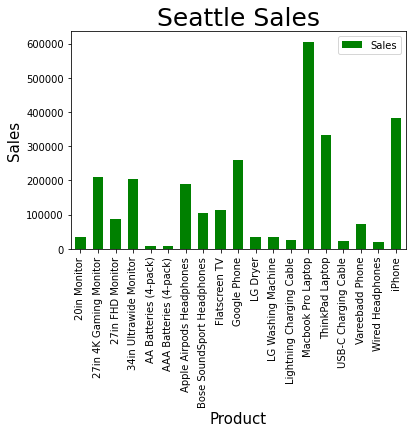

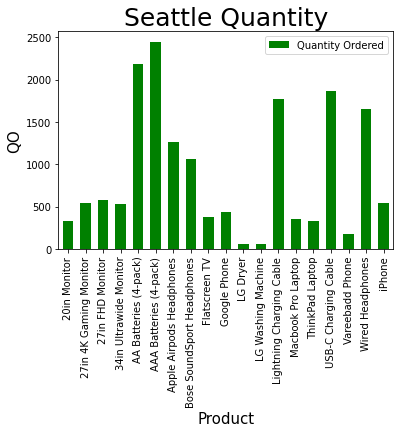

In [ ]:
df = pd.read_csv('Sales Data.csv')
#Seattle
city = {' Atlanta':0,' Austin':1,' Boston':2,' Dallas':3,' Los Angeles':4,' New York City':5,' Portland':6,' San Francisco':7,' Seattle':8}
df.City = [city[item] for item in df.City]
city_names = df[df['City'] != 8].index
df.drop(city_names, inplace=True)

df = df.drop(['Unnamed: 0','Order ID','Order Date','Price Each','Purchase Address','Price Each','City','Month'],axis=1)
agg_func = {'Product':'first','Sales':'sum','Quantity Ordered':'sum'}
df = df.groupby(df['Product']).aggregate(agg_func)

df.plot(x="Product", y='Sales', kind="bar",width=0.6,color='green')
plt.title('Seattle Sales',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('Sales',size=15)

df.plot(x="Product", y='Quantity Ordered', kind="bar",width=0.6,color='green')
plt.title('Seattle Quantity',size=25)
plt.xlabel('Product',size=15)
plt.ylabel('QO',size=15)
df.head(19)